# Research Space

Here we introduce our research space object. It computes, stores and shows multiple research space instances, with differente parameters or models.

In [1]:
import pandas as pd
import sys
sys.path.append("../")
from MapSci.papers import papers
from MapSci.research_space import research_space

We will first load our papers object as in [the previous notebook](https://github.com/franciscogaluppo/science-of-science/blob/master/examples/1\)%20Papers.ipynb) using the 'lattes_categories' key. We will also initialize our research_space object with the same key, passing our papers as a parameter.

In [2]:
pp = papers("lattes_categories")
maps = research_space("lattes_categories", pp)

We are then ready to compute the phi matrix for any model configuration. Here we will pass the closed ends of the timeframe of interest. By not chosing a model, it computes for both:

In [3]:
maps.compute(1999, 2013)

frequentist(1999, 2013, 0.1)
embedding(1999, 2013, 0.1, 200)


To access the model later is important to remember its name, or trial as we call. For exameple, if we want to use the frequentist model computed above we will use ```frequentist(1999, 2013, 0.1)```.

In [4]:
trial = "embedding(1999, 2013, 0.1, 200)"

Next, we will visualize the generated research spaces. One interesting aspect is to see if the research fields in the same macro area are close together. To do that, we will first load a dataframe that maps every field to the intermediate ("Classification") and macro ("Subject area") areas:

In [5]:
areas = pd.read_pickle("../dataset/SJR/areas.pkl")
areas.head()

,Code,Field,Subject area,Classification
0,1000.0,multidisciplinary,health sciences,multidisciplinary
1,1100.0,general agricultural and biological sciences,life sciences,agricultural and biological sciences
2,1101.0,agricultural and biological sciences (miscella...,life sciences,agricultural and biological sciences
3,1102.0,agronomy and crop science,life sciences,agricultural and biological sciences
4,1103.0,animal science and zoology,life sciences,agricultural and biological sciences


The code below creates a list of values, where each value corresponds to a macro area. It is sorted to align with the vertices in the research space

In [6]:
fields = maps.phi[trial][1].keys()
dict_area = areas[["Field", "Subject area"]].set_index("Field").to_dict()["Subject area"]
unique = areas["Subject area"].unique()
subs = {u: v for v,u in enumerate(sorted(unique))}
values = [subs[dict_area[node]] for node in fields]

We can then call the ```plot``` function:

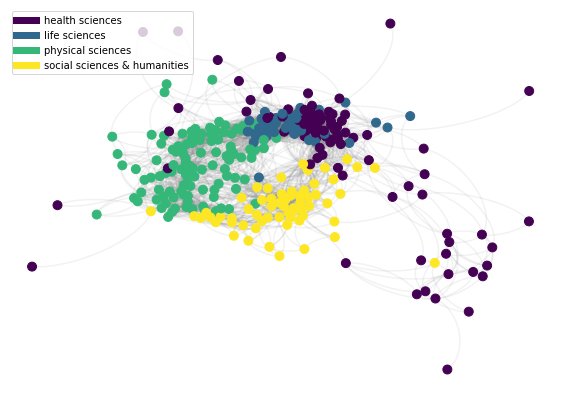

In [7]:
pos1 = maps.plot(trial, values, threshold=0.32, labels=subs, new=True)

We can clearly see three dense and well defined clusters:
1. Physical sciences;
1. Social sciences and humanities;
1. Life sciences + Health sciences.